In [92]:
import functools as ft
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tflearn as tflearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud
from bs4 import BeautifulSoup

In [68]:
biology_data = pd.read_csv("data/biology.csv")
cooking_data = pd.read_csv("data/cooking.csv")
crypto_data = pd.read_csv("data/crypto.csv")
diy_data = pd.read_csv("data/diy.csv")
robotics_data = pd.read_csv("data/robotics.csv")
travel_data = pd.read_csv("data/travel.csv")
test_data = pd.read_csv("data/test.csv")

data = biology_data
data = data.append(cooking_data)
data = data.append(crypto_data)
data = data.append(diy_data)
data = data.append(robotics_data)
data = data.append(travel_data)
# data = data.append(test_data)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87000 entries, 0 to 19278
Data columns (total 4 columns):
id         87000 non-null int64
title      87000 non-null object
content    87000 non-null object
tags       87000 non-null object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


## Helpers

In [26]:
def log(l, t):
    print('')
    print('==> ' + str(l) + ': ' + str(t))

## Data preprocessing
* cleanup html tags
* lower case
* stop words
* fix spelling errors
* remove short words (1 and 2 chars)
* tokenize compound words (e.g. cell-biology becomes cell and biology)

* stemming aka find the root of words (plurals, tenses, etc)

In [79]:
# del data['content']
data['tag'] = data.tags.map(lambda t: t.split()[0].split('-')[0])

data.head()

,id,title,content,tags,tag
0,1,What is the criticality of the ribosome bindin...,"<p>In prokaryotic translation, how critical fo...",ribosome binding-sites translation synthetic-b...,ribosome
1,2,How is RNAse contamination in RNA based experi...,<p>Does anyone have any suggestions to prevent...,rna biochemistry,rna
2,3,Are lymphocyte sizes clustered in two groups?,<p>Tortora writes in <em>Principles of Anatomy...,immunology cell-biology hematology,immunology
3,4,How long does antibiotic-dosed LB maintain goo...,<p>Various people in our lab will prepare a li...,cell-culture,cell
4,5,Is exon order always preserved in splicing?,<p>Are there any cases in which the splicing m...,splicing mrna spliceosome introns exons,splicing


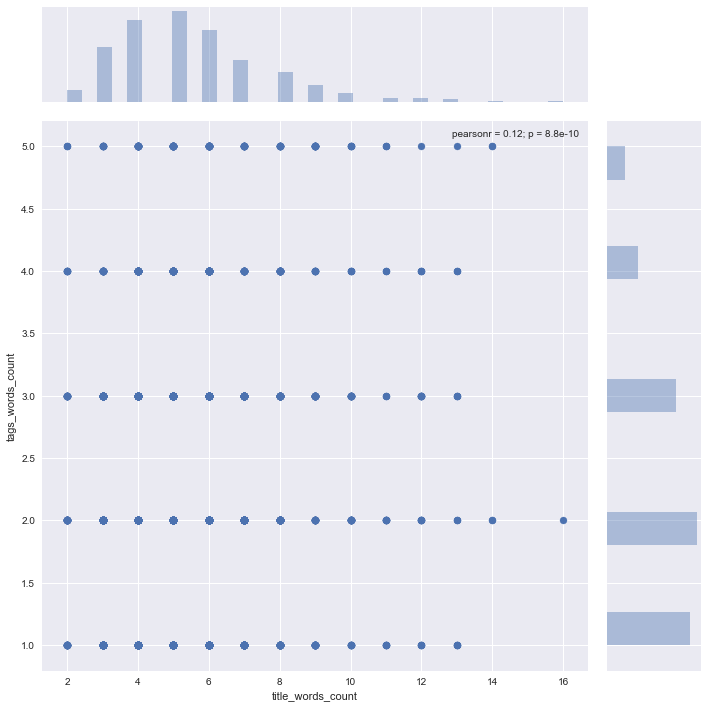

In [7]:
ax = sns.jointplot(data.title_words_count, data.tags_words_count, size=10)
plt.show()

In [98]:
x_vectorizer = CountVectorizer(min_df=10, max_df=50, stop_words='english')
x_vectorizer.fit(data.title.append(data.tags))
X = x_vectorizer.transform(data.title).toarray()
log('X shape', X.shape)
log('X features', x_vectorizer.get_feature_names())



==> X shape: (87000, 4463)

==> X features: ['00', '000', '1000', '1024', '11', '110', '110v', '120', '12v', '13', '140', '150', '160', '17', '19', '1st', '200', '2012', '2013', '2014', '2015', '2016', '2048', '20a', '20amp', '21', '22', '220', '220v', '23', '230', '240', '24v', '25', '26', '28', '2d', '2x4', '2x4s', '2x6', '300', '31', '32', '35', '36', '3g', '3rd', '400', '45', '48', '4g', '4x4', '500', '509', '60hz', '64', '6x6', '70', '72', '75', '80', '94', '96', 'aa', 'ab', 'ababa', 'abandoned', 'ability', 'abiogenesis', 'abs', 'absence', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'absorption', 'abu', 'academic', 'acceleration', 'accept', 'accepted', 'accessibility', 'accessible', 'accident', 'accidentally', 'accomodation', 'according', 'accounts', 'accumulator', 'accumulators', 'accuracy', 'accurate', 'accurately', 'acidic', 'acoustic', 'acquired', 'acrylic', 'act', 'activate', 'activated', 'activation', 'adapt', 'adapters', 'adaptive', 'adaptor', 'addis', 'ad

In [78]:
# we want all tags
y_vectorizer = CountVectorizer(stop_words='english')
y_vectorizer.fit(data.tag)
Y = y_vectorizer.transform(data.tag).toarray()
log('Y shape', Y.shape)
log('Y features', y_vectorizer.get_feature_names())




==> Y shape: (87000, 1940)

==> Y features: ['240v', '2nd', '3d', '3des', 'abe', 'abiogenesis', 'abu', 'accelerometer', 'access', 'accessibility', 'accommodation', 'accumulators', 'acoustic', 'acrylic', 'action', 'activerobot', 'activities', 'actuator', 'adaptation', 'addiction', 'addis', 'addition', 'additives', 'adhesive', 'adventure', 'adversarial', 'advice', 'aes', 'afci', 'affine', 'africa', 'african', 'agriculture', 'aids', 'air', 'airbnb', 'aircraft', 'airlines', 'airport', 'airports', 'alarm', 'alaska', 'albanian', 'alcohol', 'algebraic', 'algorithm', 'allergies', 'allergy', 'almond', 'almonds', 'alternative', 'aluminum', 'amazon', 'american', 'amino', 'ams', 'amsterdam', 'amtrak', 'anaerobic', 'anatomy', 'anchor', 'angle', 'animal', 'anonymity', 'ant', 'antarctica', 'anthropology', 'antibiotic', 'antibiotics', 'antibody', 'antigen', 'ants', 'apoptosis', 'apples', 'appliances', 'application', 'applications', 'aquaculture', 'arachnology', 'architecture', 'arduino', 'ardupilot',

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
log('X train', X_train.shape)
log('Y train', Y_train.shape)
log('X test', X_test.shape)
log('Y test', Y_test.shape)


==> X train: (58290, 5274)

==> Y train: (58290, 2274)

==> X test: (28710, 5274)

==> Y test: (28710, 2274)


In [67]:
net = tflearn.input_data(shape=[None, X.shape[1]])
net = tflearn.fully_connected(net, X.shape[1] * 2)
net = tflearn.fully_connected(net, Y.shape[1], activation='softmax')
net = tflearn.regression(net)

model = tflearn.DNN(net)
model.fit(X_train, Y_train, validation_set=(X_test, Y_test), n_epoch=10, batch_size=1000, show_metric=True)

Training Step: 589  | total loss: 2.41579 | time: 456.627s
| Adam | epoch: 010 | loss: 2.41579 - acc: 0.4961 -- iter: 58000/58290
Training Step: 590  | total loss: 2.42485 | time: 563.161s
| Adam | epoch: 010 | loss: 2.42485 - acc: 0.4950 | val_loss: 7.20262 - val_acc: 0.1607 -- iter: 58290/58290
--


In [71]:
model.evaluate(X_test, Y_test)

[0.16074538488435397]

In [70]:
model.save('dnn-nb')

INFO:tensorflow:/Users/icostan/Work/kaggle/tags/dnn-nb is not in all_model_checkpoint_paths. Manually adding it.


In [80]:
test_data.head()

,id,title,content
0,1,What is spin as it relates to subatomic partic...,<p>I often hear about subatomic particles havi...
1,2,What is your simplest explanation of the strin...,<p>How would you explain string theory to non ...
2,3,"Lie theory, Representations and particle physics",<p>This is a question that has been posted at ...
3,7,Will Determinism be ever possible?,<p>What are the main problems that we need to ...
4,9,Hamilton's Principle,<p>Hamilton's principle states that a dynamic ...


In [75]:
# we want all tags
XX = x_vectorizer.transform(test_data.title).toarray()
log('XX', X_pred.shape)

YY= pd.DataFrame(model.predict(XX[:2, :]))
log('YY', YY.shape)
# log('YY', YY.idxmax())


==> XX: (81926, 5274)

==> YY: (2, 2274)

==> YY: 0       0
1       0
2       1
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2244    0
2245    0
2246    0
2247    0
2248    0
2249    0
2250    0
2251    0
2252    0
2253    0
2254    0
2255    0
2256    0
2257    0
2258    0
2259    0
2260    0
2261    0
2262    0
2263    0
2264    0
2265    0
2266    0
2267    0
2268    0
2269    0
2270    0
2271    0
2272    0
2273    0
dtype: int64


## References
* http://mlwave.com/kaggle-ensembling-guide/
* https://www.kaggle.com/tjvananne/transfer-learning-on-stack-exchange-tags/tag-to-title-content-matching-in-r-first-attempt
* https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/discussion/6650